In [1]:
# for Mathematical and Dataframe Operations
import numpy as np
import pandas as pd

# for Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# setting up the background style
plt.style.use('fivethirtyeight')

### Reading the Dataset

In [2]:
# reading the data set
data = pd.read_csv('fb-data.csv')

# Print the Shape
data.shape

(1143, 11)

In [3]:
# lets check the head of the dataset
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


* ```ad_id```: an unique ID for each ad.
------------------
* ``` xyzcampaignid```: an ID associated with each ad campaign of XYZ company.
---------------------
* ```fbcampaignid```: an ID associated with how Facebook tracks each campaign.
--------------------
* ```age```: age of the person to whom the ad is shown.
------------------
* ```gender```: gender of the person to whim the add is shown
----------------
* ```interest```: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).
---------------
* ```Impressions```: the number of times the ad was shown.
----------------
* ```Clicks```: number of clicks on for that ad.
-----------------
* ```Spent```: Amount paid by the company xyz to Facebook in Dollars, to show that ad.
----------------
* ```Total conversion```: Total number of people who enquired about the product after seeing the ad.
----------------
* ```Approved conversion```: Total number of people who bought the product after seeing the ad.

### Summarizing the Dataset

In [4]:
data[['Impressions','Clicks','Spent',
      'Total_Conversion','Approved_Conversion']].describe()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
## lets analyze the Campaigns

print("Number of Unique Ads :", data['ad_id'].nunique())
print("Number of Campaigns :", data['xyz_campaign_id'].nunique())
print("Number of Facebook Campaigns :", data['fb_campaign_id'].nunique())
print("Number of Interest Groups :", data['interest'].nunique())
print("Number of Age Groups :", data['age'].nunique())

Number of Unique Ads : 1143
Number of Campaigns : 3
Number of Facebook Campaigns : 691
Number of Interest Groups : 40
Number of Age Groups : 4


In [6]:
# as we can see that every ad is having an Unique ID, so we will remove that column.
# again, Facebook campaign has no relation with any conversion, so, let's remove this column also.

data = data.drop(['ad_id', 'fb_campaign_id'], axis = 1)

# now lets check the column names again to make sure above columns are removed
data.columns

Index(['xyz_campaign_id', 'age', 'gender', 'interest', 'Impressions', 'Clicks',
       'Spent', 'Total_Conversion', 'Approved_Conversion'],
      dtype='object')

In [7]:
data.isnull().sum()

xyz_campaign_id        0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

### Comparing the Campaigns

In [8]:
# We can see that there are Only Three Campaigns run by the Company
# Lets check More details about the Campaigns
data['xyz_campaign_id'].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [9]:
# as we can see that the Campaign names are Numerical, Let's give it more Comprehensive Name for better understanding

data['xyz_campaign_id'] = data['xyz_campaign_id'].replace((1178, 936, 916),('campaign_c','campaign_b','campaign_a'))

# lets check the campaign names again
data['xyz_campaign_id'].value_counts()

campaign_c    625
campaign_b    464
campaign_a     54
Name: xyz_campaign_id, dtype: int64

In [10]:
# lets Compare the Conversion, Expense and Visibility among the Campaigns

data[['xyz_campaign_id','Approved_Conversion', 'Spent','Impressions']].groupby(['xyz_campaign_id'],
         as_index = False).agg('mean').rename(columns = {'xyz_campaign_id': 'Campaign',
                             'Approved_Conversion': 'Average Conversion',
                             'Spent': 'Average Expense', 
                        'Impressions':'Average Visibility'}).style.background_gradient(cmap = 'Wistia')

,Campaign,Average Conversion,Average Expense,Average Visibility
0,campaign_a,0.444444,2.772407,8943.055556
1,campaign_b,0.394397,6.235711,17517.644397
2,campaign_c,1.395200,89.059440,327717.945600


### Feature Engineering

* ```Click-through-rate (CTR)```: This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

--------------
* ```Conversion Rate (CR)```: This is the percentage of clicks that result in a 'conversion'. What a conversion is will be determined by the objectives of the campaign. It could be a sale, someone completing a contact form on a landing page, downloading an e-book, watching a video, or simply spending more than a particular amount of time or viewing over a target number of pages on a website.

-------------
* ```Cost Per Click (CPC)```: Self-explanatory this one: how much (on average) did each click cost. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables. For example, a campaign with an average CPC of £0.5 and a CR of 5% is likely achieving more with its budget than one with a CPC of £0.2 and a CR of 1% (assuming the conversion value is the same.

-----------------
* ```Cost Per Conversion```: Another simple metric, this figure is often more relevant than the CPC, as it combines the CPC and CR metrics, giving us an easy way to quickly get a feel for campaign effectiveness.

In [11]:
# Performing Feature Engineering to understand the Campaigns in Detail

# lets create a Column to understand CTR
data['ClickThroughRate'] = ((data['Clicks']/data['Impressions'])*100)

# lets create a column to understand CPC
data['CostPerClick'] = (data['Spent']/data['Clicks'])

# lets create a column to understand Conversion Rate
data['ConversionRate'] = (data['Approved_Conversion']/data['Total_Conversion'])

# lets create a column to understand the Cost per Conversion
data['CostPerConversion'] = (data['Spent']/data['Approved_Conversion']) 

* ```Conversion Value```: A conversion value is a numerical value that you assign to specific conversions in order to represent their impact to your business. The major benefit to assigning conversion values is to help you track, optimize, and report on your return on ad spend (ROAS).

----------------
* ```ROAS```: ROAS stands for return on ad spend—a marketing metric that measures the amount of revenue your business earns for each dollar it spends on advertising. For all intents and purposes, ROAS is practically the same as another metric you're probably familiar with: return on investment, or ROI.

-----------------
* ```Cost Per Mille```: This number is the cost of one thousand impressions. If your objective is ad exposure to increase brand awareness, this might be an important KPI for you to measure.

**We don't have the actual numbers to understand the Profit of after Conversion, but for the purposes of Understanding, let's assume that an Approved conversion is worth 100 dollars.** 

In [12]:
# lets add More Features to Understand the Return on Investment also known as ROAS(Return on Ad Spend)

# lets calculate the Conversion Value, Let's Assume that the Value of Sales if 100 Dollars
data['ConversionValue'] = data['Approved_Conversion']*100

# lets calculate the ROAS Which is the Target Variable for us
data['ROAS'] = round(data['ConversionValue']/data['Spent'], 2)

# lets Calculate CPM to understand the Brand Awareness from Campaigns
data['CostPerMille'] = round((data['Spent']/data['Impressions'])*1000, 2)

### Analyzing the Campaigns based on Marketing KPIs

In [13]:
# Lets remove all the records where we have any Nan, value or Infinity Value
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# lets check the shape of the data after remving unnecessary records
print("Shape of the Data After Removing Nans and Infs :", data.shape)

Shape of the Data After Removing Nans and Infs : (513, 16)


In [14]:
# lets Compare the Campaign based on the New Features Created

data[['xyz_campaign_id','ClickThroughRate','CostPerClick','ConversionRate',
     'ConversionValue','CostPerMille', 'ROAS']].groupby(['xyz_campaign_id'],
         as_index = False).agg('mean').rename(columns = {'xyz_campaign_id': 'Campaign',
                             'ClickThroughRate': 'Average CTR',
                             'CostPerClick': 'Average Cost/Click', 
                        'ConversionRate':'Average ConversionRate'}).style.background_gradient(cmap = 'Wistia')

,Campaign,Average CTR,Average Cost/Click,Average ConversionRate,ConversionValue,CostPerMille,ROAS
0,campaign_a,0.027162,1.339464,0.906250,100.000000,0.371250,42.500000
1,campaign_b,0.026293,1.372928,0.899851,105.357143,0.359732,47.035089
2,campaign_c,0.016359,1.583425,0.518370,225.714286,0.254000,5.214623


* We can see that Campaign-A and campaign-B did very well

### Analyzing Impact of Age, Gender and Interests on different Campaigns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


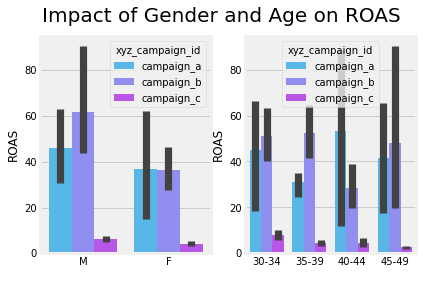

In [15]:
# Let's Compare Campaign with respect to different Groups

plt.rcParams['figure.figsize'] = (14, 4)

plt.subplot(1, 2, 1)
sns.barplot(data['gender'], data['ROAS'],
            hue = data['xyz_campaign_id'],
            palette = 'cool')
plt.xlabel(' ')

plt.subplot(1, 2, 2)
sns.barplot(data['age'], data['ROAS'],
            hue = data['xyz_campaign_id'],
            palette = 'cool')
plt.xlabel(' ')

plt.suptitle('Impact of Gender and Age on ROAS', fontsize = 20)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


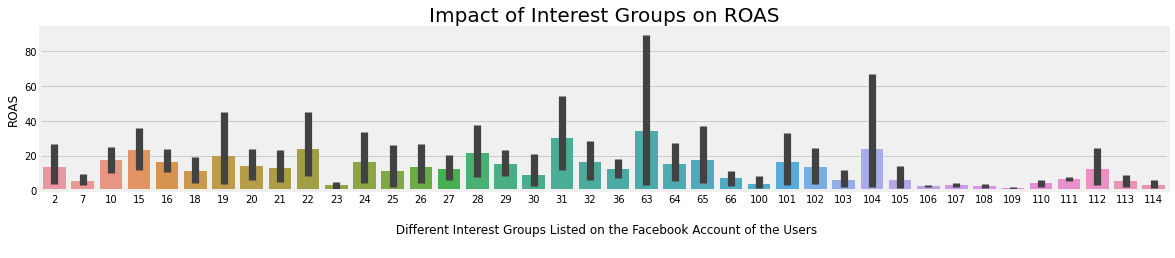

In [16]:
plt.rcParams['figure.figsize'] = (18, 3)
sns.barplot(data['interest'], data['ROAS'])
plt.title('Impact of Interest Groups on ROAS', fontsize = 20)
plt.xlabel('\n Different Interest Groups Listed on the Facebook Account of the Users\n')
plt.show()

In [17]:
# Lets Find out the Interest Groups which have Highest ROAS

data[['interest','ROAS']].sort_values(by = 'ROAS', 
                        ascending = False).head(5).style.background_gradient(cmap = 'cool')

,interest,ROAS
267,63,555.560000
215,19,204.080000
244,16,175.440000
318,29,138.890000
484,28,125.790000


### Analyzing the Brand Awareness

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


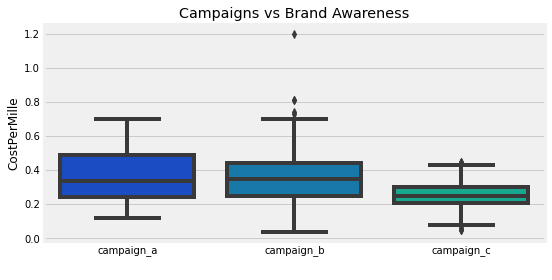

In [18]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.boxplot(data['xyz_campaign_id'], data['CostPerMille'],
           palette = 'winter')
plt.title('Campaigns vs Brand Awareness')
plt.xlabel(' ')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


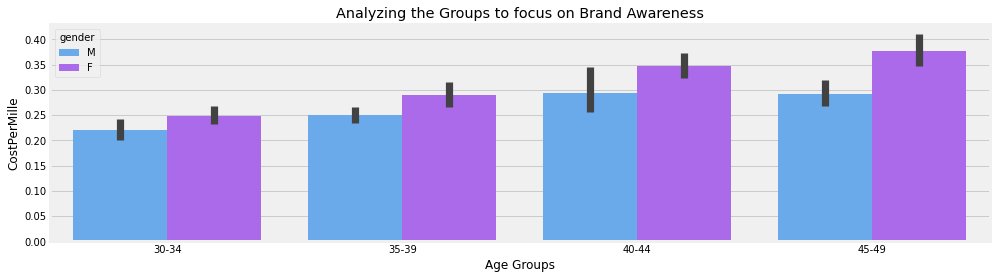

In [19]:
# Lets Compare the Cost Per Mille 

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['age'], data['CostPerMille'], 
            hue = data['gender'],
           palette = 'cool')
plt.xlabel('Age Groups')
plt.title('Analyzing the Groups to focus on Brand Awareness')
plt.show()

### Relationshop between Clicks and Impressions

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


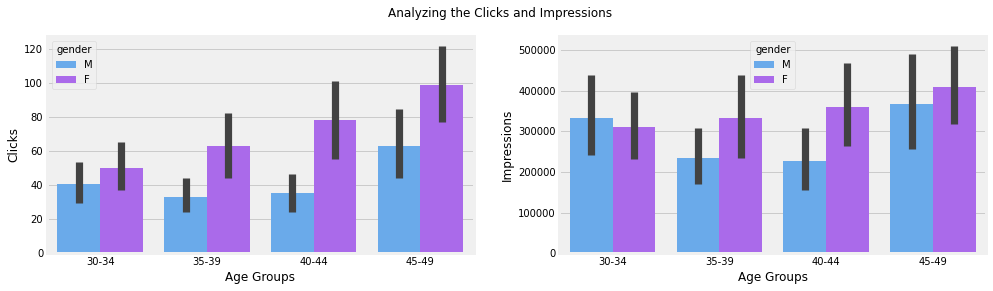

In [20]:
# Lets Analyze the Clicks and Impressions

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.barplot(data['age'], data['Clicks'], 
            hue = data['gender'],
           palette = 'cool')
plt.xlabel('Age Groups')

plt.subplot(1, 2, 2)
sns.barplot(data['age'], data['Impressions'], 
            hue = data['gender'],
           palette = 'cool')
plt.xlabel('Age Groups')

plt.suptitle('Analyzing the Clicks and Impressions')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


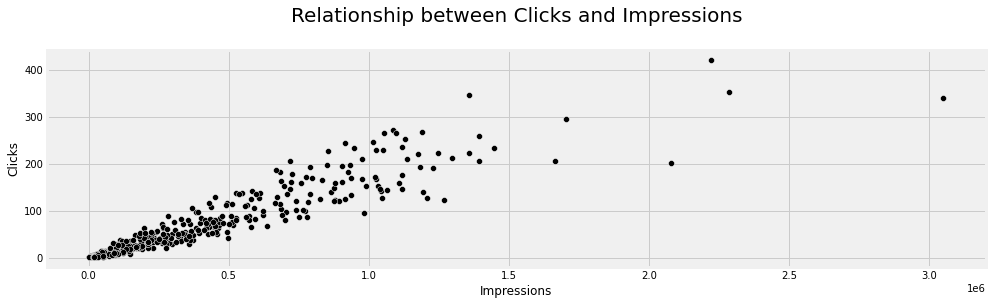

In [21]:
# lets also check the Relationship between Clicks and Impressions

plt.rcParams['figure.figsize'] = (15, 4)
sns.scatterplot(data['Impressions'], data['Clicks'],
               color = 'black')
plt.title('Relationship between Clicks and Impressions\n', fontsize = 20)
plt.show()

In [22]:
# Lets Categorize the Clicks and Check the Impact on Impressions

# lets create a function to categorize the Clicks Column
def cat(x):
    if x <= 100:
        return '0-100'
    elif x <= 200:
        return '100-200'
    elif x <= 300:
        return '200-300'
    else:
        return '300+'
        
# lets apply the above function on clicks
data['Clicks'] = data['Clicks'].apply(cat)

# lets understand the Impact of Impressions on Clicks
data[['Impressions','Clicks']].groupby('Clicks').agg(['mean']).style.background_gradient(cmap = 'Wistia')

,Impressions
,mean
Clicks,
0-100,163307.390777
100-200,800683.319444
200-300,1203176.360000
300+,2229958.250000


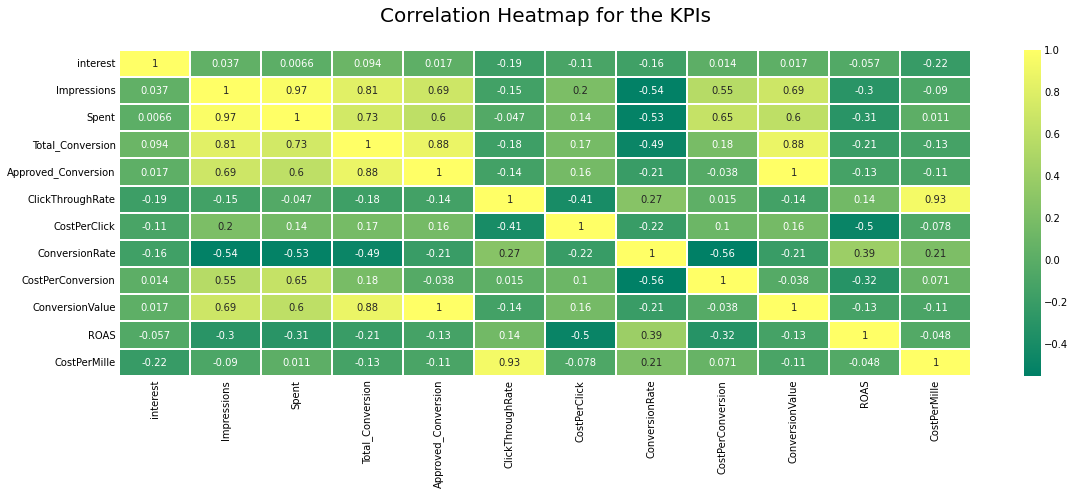

In [23]:
# lets Correlation between all the Factors

plt.rcParams['figure.figsize'] = (17, 6)
sns.heatmap(data.corr(), 
            annot = True, linewidths = 2.0,
           cmap = 'summer')
plt.title('Correlation Heatmap for the KPIs\n', fontsize = 20)
plt.show()